In [1]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
import numpy as np

# Load the dataset
df = pd.read_csv("Iris.csv")

# Separate features (X) and target (y)
X = df.drop("Species", axis=1)
y = df["Species"]

# Convert the categorical species column into numerical one-hot encoded columns
y_encoded = pd.get_dummies(y, prefix="Species")

print("Original dataset:")
print(df.head())
print("\nOne-hot encoded target:")
print(y_encoded.head())

# 80:10:10 split
X_train_80, X_temp, y_train_80, y_temp = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_val_80, X_test_80, y_val_80, y_test_80 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train a Linear Regression model for each species
models_80 = {}
y_pred_80 = pd.DataFrame(index=X_test_80.index, columns=y_encoded.columns)

for col in y_encoded.columns:
    model = LinearRegression()
    model.fit(X_train_80, y_train_80[col])
    models_80[col] = model
    y_pred_80[col] = model.predict(X_test_80)

print("\n--- Performance for 80:10:10 Split ---")
for col in y_encoded.columns:
    mse = mean_squared_error(y_test_80[col], y_pred_80[col])
    r2 = r2_score(y_test_80[col], y_pred_80[col])
    print(f"Model for {col}: MSE = {mse:.4f}, R-squared = {r2:.4f}")

y_pred_class_80 = y_pred_80.idxmax(axis=1).str.replace('Species_', '')
y_test_class_80 = y_test_80.idxmax(axis=1).str.replace('Species_', '')
accuracy_80 = (y_pred_class_80 == y_test_class_80).mean()
print(f"Overall Accuracy: {accuracy_80:.2%}")

# 70:15:15 split
X_train_70, X_temp_70, y_train_70, y_temp_70 = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
X_val_70, X_test_70, y_val_70, y_test_70 = train_test_split(X_temp_70, y_temp_70, test_size=0.5, random_state=42)

# Train a Linear Regression model for each species
models_70 = {}
y_pred_70 = pd.DataFrame(index=X_test_70.index, columns=y_encoded.columns)

for col in y_encoded.columns:
    model = LinearRegression()
    model.fit(X_train_70, y_train_70[col])
    models_70[col] = model
    y_pred_70[col] = model.predict(X_test_70)

print("\n--- Performance for 70:15:15 Split ---")
for col in y_encoded.columns:
    mse = mean_squared_error(y_test_70[col], y_pred_70[col])
    r2 = r2_score(y_test_70[col], y_pred_70[col])
    print(f"Model for {col}: MSE = {mse:.4f}, R-squared = {r2:.4f}")

y_pred_class_70 = y_pred_70.idxmax(axis=1).str.replace('Species_', '')
y_test_class_70 = y_test_70.idxmax(axis=1).str.replace('Species_', '')
accuracy_70 = (y_pred_class_70 == y_test_class_70).mean()
print(f"Overall Accuracy: {accuracy_70:.2%}")

Original dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

One-hot encoded target:
   Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica
0                 True                    False                   False
1                 True                    False                   False
2                 True                    False                   False
3                 True                    False                   False
4                 True                    False                   False

--- Performance for 80:10:10 Split ---
Model for Species_Iris-

In [11]:
X_train_over, X_temp_over, y_train_over, y_temp_over = train_test_split(X, y, test_size=0.2, random_state=42)
X_val_over, X_test_over, y_val_over, y_test_over = train_test_split(X_temp_over, y_temp_over, test_size=0.5, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_resampled_over, y_train_resampled_over = ros.fit_resample(X_train_over, y_train_over)

y_train_encoded_over = pd.get_dummies(y_train_resampled_over, prefix="Species")
y_test_encoded_over = pd.get_dummies(y_test_over, prefix="Species")

models_over = {}
y_pred_over = pd.DataFrame(index=X_test_over.index, columns=y_encoded.columns)

for col in y_encoded.columns:
    model = LinearRegression()
    model.fit(X_train_resampled_over, y_train_encoded_over[col])
    models_over[col] = model
    y_pred_over[col] = model.predict(X_test_over)

print("\n--- Performance with RandomOverSampler ---")
for col in y_encoded.columns:
    mse = mean_squared_error(y_test_encoded_over[col], y_pred_over[col])
    r2 = r2_score(y_test_encoded_over[col], y_pred_over[col])
    print(f"Model for {col}: MSE = {mse:.4f}, R-squared = {r2:.4f}")

y_pred_class_over = y_pred_over.idxmax(axis=1).str.replace('Species_', '')
y_test_class_over = y_test_over.str.replace('Species_', '')
accuracy_over = (y_pred_class_over == y_test_class_over).mean()
print(f"Overall Accuracy: {accuracy_over:.2%}")


--- Performance with RandomOverSampler ---
Model for Species_Iris-setosa: MSE = 0.0166, R-squared = 0.9255
Model for Species_Iris-versicolor: MSE = 0.1035, R-squared = 0.5686
Model for Species_Iris-virginica: MSE = 0.0438, R-squared = 0.7763
Overall Accuracy: 100.00%


In [13]:
X_train, X_test, y_train_smote, y_test_smote = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train_smote, y_val_smote = train_test_split(X_train, y_train_smote, test_size=0.125, random_state=42, stratify=y_train_smote)

# SMOTE Setting A: Take any 2 samples from the minority class to generate new points (k_neighbors=2)
smote_A = SMOTE(sampling_strategy='auto', k_neighbors=2, random_state=42)
X_train_smote_A, y_train_smote_A = smote_A.fit_resample(X_train, y_train_smote)
y_train_encoded_A = pd.get_dummies(y_train_smote_A, prefix="Species")
y_test_encoded = pd.get_dummies(y_test_smote, prefix="Species")

models_smote_A = {}
y_pred_smote_A = pd.DataFrame(index=X_test.index, columns=y_encoded.columns)

for col in y_encoded.columns:
    model = LinearRegression()
    model.fit(X_train_smote_A, y_train_encoded_A[col])
    models_smote_A[col] = model
    y_pred_smote_A[col] = model.predict(X_test)

print("\n--- Performance with SMOTE (k=2) ---")
for col in y_encoded.columns:
    mse = mean_squared_error(y_test_encoded[col], y_pred_smote_A[col])
    r2 = r2_score(y_test_encoded[col], y_pred_smote_A[col])
    print(f"Model for {col}: MSE = {mse:.4f}, R-squared = {r2:.4f}")

y_pred_class_smote_A = y_pred_smote_A.idxmax(axis=1).str.replace('Species_', '')
accuracy_smote_A = (y_pred_class_smote_A == y_test_smote).mean()
print(f"Overall Accuracy: {accuracy_smote_A:.2%}")

# SMOTE Setting B: Find the nearest sample for any sample (k_neighbors=5, the default)
smote_B = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
X_train_smote_B, y_train_smote_B = smote_B.fit_resample(X_train, y_train_smote)
y_train_encoded_B = pd.get_dummies(y_train_smote_B, prefix="Species")

models_smote_B = {}
y_pred_smote_B = pd.DataFrame(index=X_test.index, columns=y_encoded.columns)

for col in y_encoded.columns:
    model = LinearRegression()
    model.fit(X_train_smote_B, y_train_encoded_B[col])
    models_smote_B[col] = model
    y_pred_smote_B[col] = model.predict(X_test)

print("\n--- Performance with SMOTE (k=5) ---")
for col in y_encoded.columns:
    mse = mean_squared_error(y_test_encoded[col], y_pred_smote_B[col])
    r2 = r2_score(y_test_encoded[col], y_pred_smote_B[col])
    print(f"Model for {col}: MSE = {mse:.4f}, R-squared = {r2:.4f}")

y_pred_class_smote_B = y_pred_smote_B.idxmax(axis=1).str.replace('Species_', '')
accuracy_smote_B = (y_pred_class_smote_B == y_test_smote).mean()
print(f"Overall Accuracy: {accuracy_smote_B:.2%}")


--- Performance with SMOTE (k=2) ---
Model for Species_Iris-setosa: MSE = 0.0189, R-squared = 0.9151
Model for Species_Iris-versicolor: MSE = 0.1180, R-squared = 0.4690
Model for Species_Iris-virginica: MSE = 0.0537, R-squared = 0.7583
Overall Accuracy: 93.33%

--- Performance with SMOTE (k=5) ---
Model for Species_Iris-setosa: MSE = 0.0189, R-squared = 0.9151
Model for Species_Iris-versicolor: MSE = 0.1180, R-squared = 0.4690
Model for Species_Iris-virginica: MSE = 0.0537, R-squared = 0.7583
Overall Accuracy: 93.33%


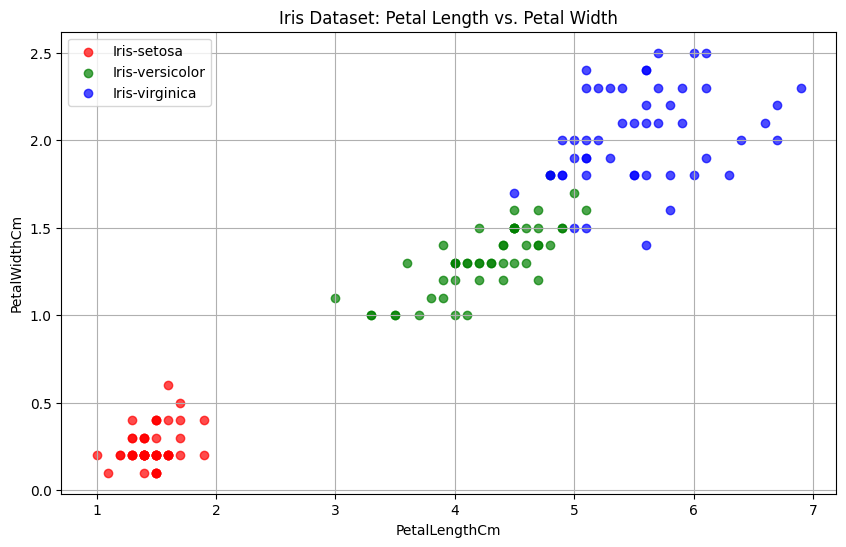

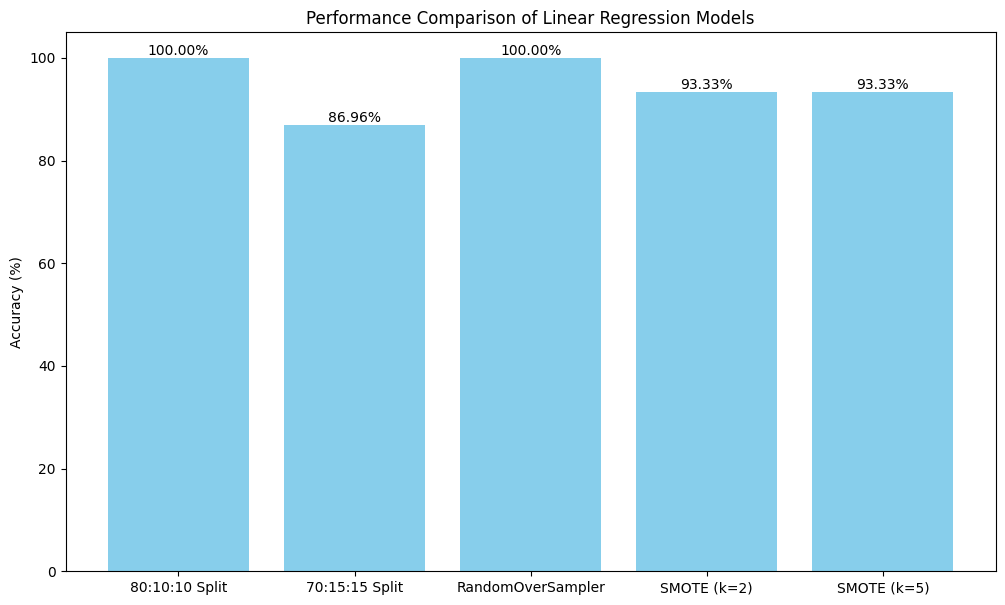

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming the accuracy variables are already defined from previous steps:
# accuracy_80
# accuracy_70
# accuracy_over
# accuracy_smote_A
# accuracy_smote_B

# Load the dataset again for the scatter plot
df = pd.read_csv("Iris.csv")

# Create the scatter plot
plt.figure(figsize=(10, 6))
species_colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
for species in df['Species'].unique():
    subset = df[df['Species'] == species]
    plt.scatter(subset['PetalLengthCm'], subset['PetalWidthCm'],
                c=species_colors[species], label=species, alpha=0.7)

plt.title('Iris Dataset: Petal Length vs. Petal Width')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.grid(True)
plt.savefig('petal_scatter_plot.png')

# Create the bar chart for accuracy comparison
model_accuracies = {
    '80:10:10 Split': accuracy_80,
    '70:15:15 Split': accuracy_70,
    'RandomOverSampler': accuracy_over,
    'SMOTE (k=2)': accuracy_smote_A,
    'SMOTE (k=5)': accuracy_smote_B
}

plt.figure(figsize=(12, 7))
bars = plt.bar(model_accuracies.keys(), [x * 100 for x in model_accuracies.values()], color='skyblue')
plt.ylabel('Accuracy (%)')
plt.title('Performance Comparison of Linear Regression Models')
plt.ylim(0, 105)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}%', va='bottom', ha='center')

plt.savefig('model_accuracy_comparison.png')